In [1]:
import os

In [2]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 2\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 2'

In [5]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras. layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [8]:
from sklearn.model_selection import train_test_split
import os
from pathlib import Path

In [9]:
dataset_dir = Path(os.getcwd()) / "dataset/Balanced_train"

In [10]:
picture_size = 64

In [11]:
batch_size  = 128
datagen_train  = ImageDataGenerator()


In [12]:
file_paths = []
labels = []

for class_name in os.listdir(dataset_dir):
    class_dir = dataset_dir / class_name
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_paths.append(str(class_dir / file_name))
            labels.append(class_name)


In [13]:
data = pd.DataFrame({'file_path': file_paths, 'label': labels})


In [14]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [15]:
train_set = datagen_train.flow_from_dataframe(
    dataframe=train_data,
    x_col='file_path',
    y_col='label',
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 2441 validated image filenames belonging to 7 classes.


In [16]:


def log_dataset_info(dataset):
   
    # Check if the input is train_set or test_set
    if 'train' in str(dataset).lower():
        dataset_type = "Train Set"
    elif 'test' in str(dataset).lower():
        dataset_type = "Test Set"
    else:
        dataset_type = "Dataset"

    # Log dataset information
    logging.info(f"{dataset_type} Information:")
    class_labels = sorted(dataset.class_indices.items(), key=lambda x: x[1])
    for label, index in class_labels:
        num_images = len([x for x in dataset.labels if x == index])
        logging.info(f"Class '{label}' (index {index}): {num_images} images")

In [17]:
log_dataset_info(train_set)

2024-05-04 01:13:19 - INFO - Dataset Information:
2024-05-04 01:13:19 - INFO - Class 'angry' (index 0): 337 images
2024-05-04 01:13:19 - INFO - Class 'disgust' (index 1): 345 images
2024-05-04 01:13:19 - INFO - Class 'fear' (index 2): 360 images
2024-05-04 01:13:19 - INFO - Class 'happy' (index 3): 347 images
2024-05-04 01:13:19 - INFO - Class 'neutral' (index 4): 350 images
2024-05-04 01:13:19 - INFO - Class 'sad' (index 5): 350 images
2024-05-04 01:13:19 - INFO - Class 'surprise' (index 6): 352 images


In [18]:
test_set = datagen_train.flow_from_dataframe(
    dataframe=test_data,
    x_col='file_path',
    y_col='label',
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 611 validated image filenames belonging to 7 classes.


In [19]:
log_dataset_info(test_set)

2024-05-04 01:13:19 - INFO - Dataset Information:
2024-05-04 01:13:19 - INFO - Class 'angry' (index 0): 99 images
2024-05-04 01:13:19 - INFO - Class 'disgust' (index 1): 91 images
2024-05-04 01:13:19 - INFO - Class 'fear' (index 2): 76 images
2024-05-04 01:13:19 - INFO - Class 'happy' (index 3): 89 images
2024-05-04 01:13:19 - INFO - Class 'neutral' (index 4): 86 images
2024-05-04 01:13:19 - INFO - Class 'sad' (index 5): 86 images
2024-05-04 01:13:19 - INFO - Class 'surprise' (index 6): 84 images


In [20]:
from keras.optimizers import Adam,SGD,RMSprop

# Alex Net

In [21]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Add, Conv2D, DepthwiseConv2D, SeparableConv2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, ZeroPadding2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Activation, LeakyReLU
import keras.backend as K
from time import time
import numpy as np

In [22]:
input_shape = 64, 64, 1
n_classes = 7

In [23]:
def alexnet(input_shape, n_classes):
    input = Input(input_shape)
    x = Conv2D(96, 11, strides=4, padding="same", activation="relu")(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(256, 5, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(384, 3, strides=1, padding="same", activation="relu")(x)

    x = Conv2D(384, 3, strides=1, padding="same", activation="relu")(x)

    x = Conv2D(256, 3, strides=1, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model


model = alexnet(input_shape, n_classes)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 256)           │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │          28,679 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,589,063 (82.36 MB)

 Trainable params: 21,587,847 (82.35 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [24]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [25]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/Alexnet"/ "Alexnet_model.h5")

Epoch 1/50


C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1416 - loss: 5.0480 - val_accuracy: 0.1660 - val_loss: 3.8659 - learning_rate: 0.0010
Epoch 2/50
 1/19 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.1641 - loss: 1.9561

C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.1641 - loss: 1.9561 - val_accuracy: 0.1414 - val_loss: 3.9556 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - accuracy: 0.1448 - loss: 1.9665 - val_accuracy: 0.1289 - val_loss: 2.1915 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1328 - loss: 1.9467 - val_accuracy: 0.1010 - val_loss: 2.1603 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.1430 - loss: 1.9442
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step - accuracy: 0.1435 - loss: 1.9443 - val_accuracy: 0.1367 - val_loss: 2.0649 - learning_rate: 0.0010
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


2024-05-04 01:14:33 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


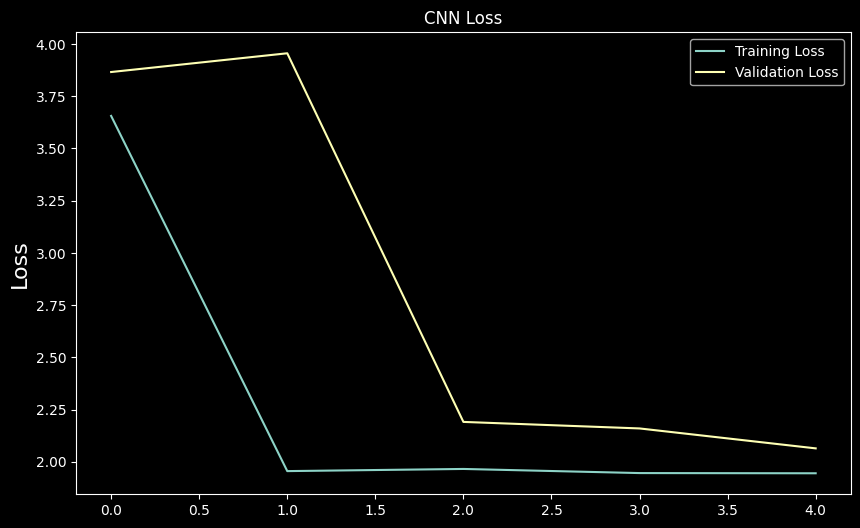

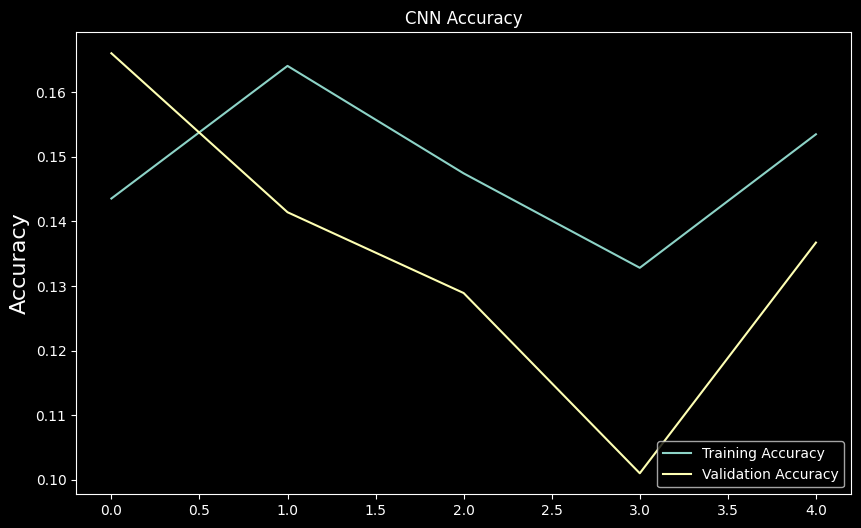

In [26]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


# VGG16

In [27]:
# VGG16

def vgg16(input_shape, n_classes):

    input = Input(input_shape)

    x = Conv2D(64, 3, padding="same", activation="relu")(input)
    x = Conv2D(64, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model


model = vgg16(input_shape, n_classes)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 39,916,231 (152.27 MB)

 Trainable params: 39,916,231 (152.27 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/vgg16"/ "vgg16_model.h5")

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.1504 - loss: 63.5429 - val_accuracy: 0.1367 - val_loss: 1.9516 - learning_rate: 0.0010
Epoch 2/50
 1/19 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.1111 - loss: 1.9556

C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1111 - loss: 1.9556 - val_accuracy: 0.1414 - val_loss: 1.9467 - learning_rate: 0.0010
Epoch 3/50
 9/19 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.1612 - loss: 1.9473

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


# vgg19


In [ ]:
# vgg19


def vgg19(input_shape, n_classes):
    input = Input(input_shape)

    x = Conv2D(64, 3, padding="same", activation="relu")(input)
    x = Conv2D(64, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = vgg19(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/vgg19"/ "vgg19_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


# Densenet121

In [ ]:
# DenseNet121


def densenet121(img_shape, n_classes, f=32):
    repetitions = 6, 12, 24, 16

    def bn_rl_conv(x, f, k=1, s=1, p="same"):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides=s, padding=p)(x)
        return x

    def dense_block(tensor, r):
        for _ in range(r):
            x = bn_rl_conv(tensor, 4 * f)
            x = bn_rl_conv(x, f, 3)
            tensor = Concatenate()([tensor, x])
        return tensor

    def transition_block(x):
        x = bn_rl_conv(x, int(x.shape[-1]) // 2)
        x = AvgPool2D(2, strides=2, padding="same")(x)
        return x

    input = Input(img_shape)

    x = Conv2D(64, 7, strides=2, padding="same")(input)
    x = AvgPool2D(3, strides=2, padding="same")(x)

    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)

    x = GlobalAvgPool2D()(d)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = densenet121(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/densenet121"/ "densenet121_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


# densenet 201


In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


def densenet201(img_shape, n_classes, f=32):
    repetitions = (6, 12, 48, 32)

    def bn_rl_conv(x, f, k=1, s=1, p="same"):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides=s, padding=p)(x)
        return x

    def dense_block(tensor, r):
        for _ in range(r):
            x = bn_rl_conv(tensor, 4 * f)
            x = bn_rl_conv(x, f, 3)
            tensor = Concatenate()([tensor, x])
        return tensor

    def transition_block(x):
        if K.image_data_format() == 'channels_last':
            bn_axis = -1
        else:
            bn_axis = 1
        x = bn_rl_conv(x, K.int_shape(x)[bn_axis] // 2)
        x = AvgPool2D(2, strides=2, padding="same")(x)
        return x

    input = Input(img_shape)

    x = Conv2D(64, 7, strides=2, padding="same")(input)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    for r in repetitions:
        d = dense_block(x, r)
        x = transition_block(d)

    x = GlobalAvgPool2D()(d)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = densenet201(input_shape, n_classes)
model.summary()


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/densenet201"/ "densenet201_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


# Resnet 50

In [ ]:
def resnet50(input_shape, n_classes):
    def identity_block(input_tensor, filters):
        """Identity block"""
        filters1, filters2, filters3 = filters

        x = Conv2D(filters1, (1, 1))(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters2, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters3, (1, 1))(x)
        x = BatchNormalization()(x)

        x = Add()([x, input_tensor])
        x = Activation('relu')(x)

        return x

    def convolutional_block(input_tensor, filters, strides=(2, 2)):
        """Convolutional block"""
        filters1, filters2, filters3 = filters

        x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters2, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters3, (1, 1))(x)
        x = BatchNormalization()(x)

        shortcut = Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])
        x = Activation('relu')(x)

        return x

    input = Input(input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D((3, 3), strides=(2, 2), padding='same')(x)

    x = convolutional_block(x, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, [64, 64, 256])
    x = identity_block(x, [64, 64, 256])

    x = convolutional_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [128, 128, 512])

    x = convolutional_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [256, 256, 1024])

    x = convolutional_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])
    x = identity_block(x, [512, 512, 2048])

    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)

    return model

model = resnet50(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/resnet50"/ "resnet50_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


In [ ]:
#inception


def googlenet(input_shape, n_classes):
    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation="relu")(x)

        t2 = Conv2D(f[1], 1, activation="relu")(x)
        t2 = Conv2D(f[2], 3, padding="same", activation="relu")(t2)

        t3 = Conv2D(f[3], 1, activation="relu")(x)
        t3 = Conv2D(f[4], 5, padding="same", activation="relu")(t3)

        t4 = MaxPool2D(3, 1, padding="same")(x)
        t4 = Conv2D(f[5], 1, activation="relu")(t4)

        output = Concatenate()([t1, t2, t3, t4])
        return output

    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding="same", activation="relu")(input)
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = Conv2D(64, 1, activation="relu")(x)
    x = Conv2D(192, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(3, strides=2)(x)

    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding="same")(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])

    x = AvgPool2D(2, strides=1)(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = googlenet(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/inception"/ "inception_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


In [ ]:
#mobilenet

def mobilenet(input_shape, n_classes):
    def mobilenet_block(x, f, s=1):
        x = DepthwiseConv2D(3, strides=s, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv2D(f, 1, strides=1, padding="same")(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    input = Input(input_shape)

    x = Conv2D(32, 3, strides=2, padding="same")(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = mobilenet_block(x, 64)
    x = mobilenet_block(x, 128, 2)
    x = mobilenet_block(x, 128)

    x = mobilenet_block(x, 256, 2)
    x = mobilenet_block(x, 256)

    x = mobilenet_block(x, 512, 2)
    for _ in range(5):
        x = mobilenet_block(x, 512)

    x = mobilenet_block(x, 1024, 2)
    x = mobilenet_block(x, 1024)

    x = GlobalAvgPool2D()(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model

model = mobilenet(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/mobilenet"/ "mobilenet_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


In [ ]:
#xception

def xception(input_shape, n_classes):
    def conv_bn(x, f, k, s=1, p="same"):
        x = Conv2D(f, k, strides=s, padding=p, use_bias=False)(x)
        x = BatchNormalization()(x)
        return x

    def sep_bn(x, f, k, s=1, p="same"):
        x = SeparableConv2D(f, k, strides=s, padding=p, use_bias=False)(x)
        x = BatchNormalization()(x)
        return x

    def entry_flow(x):
        x = conv_bn(x, 32, 3, 2)
        x = ReLU()(x)
        x = conv_bn(x, 64, 3)
        tensor = ReLU()(x)

        x = sep_bn(tensor, 128, 3)
        x = ReLU()(x)
        x = sep_bn(x, 128, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 128, 1, 2)

        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 256, 1, 2)

        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 728, 1, 2)
        x = Add()([tensor, x])

        return x

    def middle_flow(tensor):
        for _ in range(8):
            x = ReLU()(tensor)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)

            tensor = Add()([tensor, x])

        return tensor

    def exit_flow(tensor):
        x = ReLU()(tensor)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 1024, 3)
        x = MaxPool2D(3, strides=2, padding="same")(x)

        tensor = conv_bn(tensor, 1024, 1, 2)

        x = Add()([tensor, x])
        x = sep_bn(x, 1536, 3)
        x = ReLU()(x)
        x = sep_bn(x, 2048, 3)
        x = ReLU()(x)
        x = GlobalAvgPool2D()(x)
        x = Dense(n_classes, activation="softmax")(x)

        return x

    input = Input(input_shape)

    x = entry_flow(input)
    x = middle_flow(x)
    output = exit_flow(x)

    model = Model(input, output)

    return model

model = xception(input_shape, n_classes)
model.summary()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/xception"/ "xception_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "Alexnet"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Alexnet_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Alexnet_Accuracy.png")
plt.show()


In [ ]:
#yolo



def yolo(input_shape=(448, 448, 3), n_outputs=30):
    activation = LeakyReLU(0.1)

    def conv_1_3(x, f1, f2, r=1):
        for _ in range(r):
            x = Conv2D(f1, 1, padding="same", activation=activation)(x)
            x = Conv2D(f2, 3, padding="same", activation=activation)(x)
        return x

    input = Input(input_shape)

    x = Conv2D(64, 7, strides=2, padding="same", activation=activation)(input)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(192, 3, padding="same", activation=activation)(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = conv_1_3(x, 128, 256)
    x = conv_1_3(x, 256, 512)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = conv_1_3(x, 256, 512, 4)
    x = conv_1_3(x, 512, 1024)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = conv_1_3(x, 512, 1024, 2)
    x = Conv2D(1024, 3, padding="same", activation=activation)(x)
    x = Conv2D(1024, 3, strides=2, padding="same", activation=activation)(x)

    x = Conv2D(1024, 3, padding="same", activation=activation)(x)
    x = Conv2D(1024, 3, padding="same", activation=activation)(x)

    x = Dense(4096, activation=activation)(x)
    x = Flatten()(x)  # Flatten the output
    output = Dense(n_outputs)(x)

    model = Model(input, output)
    return model

model = yolo(input_shape, n_classes)
model.summary()


In [ ]:
#### from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"cnnmodel.keras"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
# callbacks_list = [checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,reduce_learningrate]
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

model.save(Path(os.getcwd()) / "model/yolo"/ "yolo_model.h5")

In [ ]:
# Save plots
plots_path = Path(os.getcwd()) / "model" / "yolo"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "yolo_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "yolo_Accuracy.png")
plt.show()
